In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile

zip_path = '/content/drive/My Drive/archive (4).zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('dataset')


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split

IMG_SIZE = 100
data = []
labels = []
LIMIT = 5000  # Load 5,000 images per class to prevent crash

for category in ["Cat", "Dog"]:
    folder = os.path.join("dataset", "PetImages", category)
    label = 0 if category == "Cat" else 1
    count = 0

    for img_name in tqdm(os.listdir(folder)):
        img_path = os.path.join(folder, img_name)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img)
            labels.append(label)
            count += 1
            if count >= LIMIT:
                break
        except:
            continue

# Normalize and split
data = np.array(data) / 255.0
labels = np.array(labels)

X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)


 40%|████      | 5012/12501 [00:05<00:07, 988.51it/s]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

# Fit to training data
datagen.fit(X_train)


In [ ]:
model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=5,
    validation_data=(X_val, y_val)
)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 102ms/step - accuracy: 0.4958 - loss: 0.7772 - val_accuracy: 0.7010 - val_loss: 0.5567
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.5074 - loss: 0.6963 - val_accuracy: 0.6020 - val_loss: 0.6758
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.4963 - loss: 0.6937 - val_accuracy: 0.5085 - val_loss: 0.6886
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.5069 - loss: 0.6928 - val_accuracy: 0.5345 - val_loss: 0.6861
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 99ms/step - accuracy: 0.5004 - loss: 0.6925 - val_accuracy: 0.6375 - val_loss: 0.6570


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output: cat=0, dog=1
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.5803 - loss: 0.6843 - val_accuracy: 0.6835 - val_loss: 0.5924
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7211 - loss: 0.5456 - val_accuracy: 0.7535 - val_loss: 0.5227
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7829 - loss: 0.4558 - val_accuracy: 0.7505 - val_loss: 0.5190
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8309 - loss: 0.3808 - val_accuracy: 0.7510 - val_loss: 0.5175
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8895 - loss: 0.2680 - val_accuracy: 0.7535 - val_loss: 0.5841


In [ ]:
model.save("dog_cat_classifier_model.h5")


In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg -O test_cat.jpg


--2025-06-19 13:31:40--  https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279603 (273K) [image/jpeg]
Saving to: ‘test_cat.jpg’

test_cat.jpg        100%[===================>] 273.05K  --.-KB/s    in 0.06s   

2025-06-19 13:31:40 (4.38 MB/s) - ‘test_cat.jpg’ saved [279603/279603]



In [ ]:
import matplotlib.pyplot as plt
import cv2

def show_prediction(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (100, 100)) / 255.0
    pred = model.predict(img_resized.reshape(1, 100, 100, 3))[0][0]

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Prediction: " + ("Dog 🐶" if pred > 0.5 else "Cat 🐱"))
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


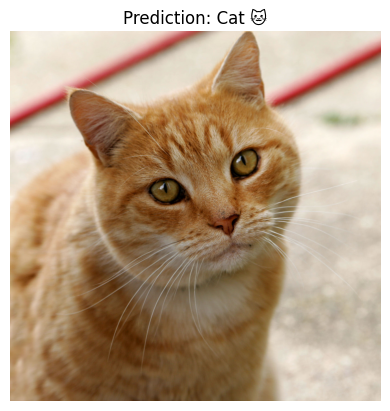

In [ ]:
show_prediction("test_cat.jpg")
